In [96]:
import os
import datetime
import requests
import json
import pandas as pd
import hvplot.pandas
import plotly.express as px
%matplotlib inline

In [97]:
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": ['CEU3231160001'],"startyear":"2019", "endyear":"2020", "registrationkey":"3040f2eebdb244b5b9ce84ba21f0c6c9"})
p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
json_data = json.loads(p.text)

In [98]:
list_of_dictionaries = json_data['Results']['series'][0]['data']
list_of_dictionaries

[{'year': '2020',
  'period': 'M03',
  'periodName': 'March',
  'latest': 'true',
  'value': '535.3',
  'footnotes': [{'code': 'P', 'text': 'preliminary'}]},
 {'year': '2020',
  'period': 'M02',
  'periodName': 'February',
  'value': '536.8',
  'footnotes': [{}]},
 {'year': '2020',
  'period': 'M01',
  'periodName': 'January',
  'value': '534.2',
  'footnotes': [{}]},
 {'year': '2019',
  'period': 'M12',
  'periodName': 'December',
  'value': '543.2',
  'footnotes': [{}]},
 {'year': '2019',
  'period': 'M11',
  'periodName': 'November',
  'value': '545.6',
  'footnotes': [{}]},
 {'year': '2019',
  'period': 'M10',
  'periodName': 'October',
  'value': '538.6',
  'footnotes': [{}]},
 {'year': '2019',
  'period': 'M09',
  'periodName': 'September',
  'value': '532.1',
  'footnotes': [{}]},
 {'year': '2019',
  'period': 'M08',
  'periodName': 'August',
  'value': '531.0',
  'footnotes': [{}]},
 {'year': '2019',
  'period': 'M07',
  'periodName': 'July',
  'value': '528.0',
  'footnotes': 

In [99]:
year_list=[]
month=[]
value=[]

for items in json_data['Results']['series'][0]['data']:
    year_list.append(items['year'])
    month.append(items['periodName'])
    value.append(float(items['value']))

In [100]:
year_df = pd.DataFrame([year_list]).transpose()
month_df = pd.DataFrame([month]).transpose()
value_df = pd.DataFrame([value]).transpose()

In [101]:
employment_data_df = pd.concat([year_df, month_df, value_df], axis='columns', join='inner')
employment_data_df

,0,0,0
0,2020,March,535.3
1,2020,February,536.8
2,2020,January,534.2
3,2019,December,543.2
4,2019,November,545.6
5,2019,October,538.6
6,2019,September,532.1
7,2019,August,531.0
8,2019,July,528.0
9,2019,June,526.1


In [102]:
employment_data_df.columns = ["Year", "Month", "Value"]
employment_data_df
employment_data_df['date'] = pd.to_datetime(employment_data_df['Year'] + employment_data_df['Month'], format='%Y%B')

In [103]:
employment_data_df

,Year,Month,Value,date
0,2020,March,535.3,2020-03-01
1,2020,February,536.8,2020-02-01
2,2020,January,534.2,2020-01-01
3,2019,December,543.2,2019-12-01
4,2019,November,545.6,2019-11-01
5,2019,October,538.6,2019-10-01
6,2019,September,532.1,2019-09-01
7,2019,August,531.0,2019-08-01
8,2019,July,528.0,2019-07-01
9,2019,June,526.1,2019-06-01


In [104]:
employment_data_df.set_index('date', inplace=True)
employment_data_df

,Year,Month,Value
date,,,
2020-03-01,2020,March,535.3
2020-02-01,2020,February,536.8
2020-01-01,2020,January,534.2
2019-12-01,2019,December,543.2
2019-11-01,2019,November,545.6
2019-10-01,2019,October,538.6
2019-09-01,2019,September,532.1
2019-08-01,2019,August,531.0
2019-07-01,2019,July,528.0


In [105]:
employment_data = employment_data_df.drop(columns = ['Year','Month'])
employment_data

,Value
date,
2020-03-01,535.3
2020-02-01,536.8
2020-01-01,534.2
2019-12-01,543.2
2019-11-01,545.6
2019-10-01,538.6
2019-09-01,532.1
2019-08-01,531.0
2019-07-01,528.0


Text(0, 0.5, 'Employees, Thousands')

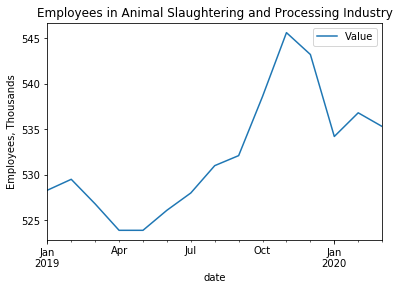

In [106]:
employment_data.plot.line(title = 'Employees in Animal Slaughtering and Processing Industry').set_ylabel('Employees, Thousands')

In [107]:
headers_hours = {'Content-type': 'application/json'}
data_hours = json.dumps({"seriesid": ['CEU3231160002'],"startyear":"2019", "endyear":"2020", "registrationkey":"3040f2eebdb244b5b9ce84ba21f0c6c9"})
p_hours = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data_hours, headers=headers_hours)
json_data_hours = json.loads(p_hours.text)

In [108]:
list_of_dictionaries = json_data_hours['Results']['series'][0]['data']
list_of_dictionaries

[{'year': '2020',
  'period': 'M03',
  'periodName': 'March',
  'latest': 'true',
  'value': '42.5',
  'footnotes': [{'code': 'P', 'text': 'preliminary'}]},
 {'year': '2020',
  'period': 'M02',
  'periodName': 'February',
  'value': '41.7',
  'footnotes': [{}]},
 {'year': '2020',
  'period': 'M01',
  'periodName': 'January',
  'value': '42.9',
  'footnotes': [{}]},
 {'year': '2019',
  'period': 'M12',
  'periodName': 'December',
  'value': '43.0',
  'footnotes': [{}]},
 {'year': '2019',
  'period': 'M11',
  'periodName': 'November',
  'value': '42.6',
  'footnotes': [{}]},
 {'year': '2019',
  'period': 'M10',
  'periodName': 'October',
  'value': '42.7',
  'footnotes': [{}]},
 {'year': '2019',
  'period': 'M09',
  'periodName': 'September',
  'value': '42.4',
  'footnotes': [{}]},
 {'year': '2019',
  'period': 'M08',
  'periodName': 'August',
  'value': '42.4',
  'footnotes': [{}]},
 {'year': '2019',
  'period': 'M07',
  'periodName': 'July',
  'value': '42.0',
  'footnotes': [{}]},
 {

In [109]:
year_list=[]
month=[]
value=[]

for items in json_data_hours['Results']['series'][0]['data']:
    year_list.append(items['year']) 
    month.append(items['periodName']) 
    value.append(float(items['value'])) 

In [110]:
year_df = pd.DataFrame([year_list]).transpose()
month_df = pd.DataFrame([month]).transpose()
value_df = pd.DataFrame([value]).transpose()

In [111]:
employment_data_df_hours = pd.concat([year_df, month_df, value_df], axis='columns', join='inner')
employment_data_df_hours

,0,0,0
0,2020,March,42.5
1,2020,February,41.7
2,2020,January,42.9
3,2019,December,43.0
4,2019,November,42.6
5,2019,October,42.7
6,2019,September,42.4
7,2019,August,42.4
8,2019,July,42.0
9,2019,June,43.0


In [112]:
employment_data_df_hours.columns = ["Year", "Month", "Value"]
employment_data_df_hours

employment_data_df_hours['date'] = pd.to_datetime(employment_data_df_hours['Year'] + employment_data_df_hours['Month'], format='%Y%B')
employment_data_df_hours

,Year,Month,Value,date
0,2020,March,42.5,2020-03-01
1,2020,February,41.7,2020-02-01
2,2020,January,42.9,2020-01-01
3,2019,December,43.0,2019-12-01
4,2019,November,42.6,2019-11-01
5,2019,October,42.7,2019-10-01
6,2019,September,42.4,2019-09-01
7,2019,August,42.4,2019-08-01
8,2019,July,42.0,2019-07-01
9,2019,June,43.0,2019-06-01


In [113]:
employment_data_df_hours.set_index('date', inplace=True)
employment_data_df_hours

,Year,Month,Value
date,,,
2020-03-01,2020,March,42.5
2020-02-01,2020,February,41.7
2020-01-01,2020,January,42.9
2019-12-01,2019,December,43.0
2019-11-01,2019,November,42.6
2019-10-01,2019,October,42.7
2019-09-01,2019,September,42.4
2019-08-01,2019,August,42.4
2019-07-01,2019,July,42.0


In [114]:
employment_data_hours = employment_data_df_hours.drop(columns = ['Year','Month'])
employment_data_hours

,Value
date,
2020-03-01,42.5
2020-02-01,41.7
2020-01-01,42.9
2019-12-01,43.0
2019-11-01,42.6
2019-10-01,42.7
2019-09-01,42.4
2019-08-01,42.4
2019-07-01,42.0


Text(0, 0.5, 'Hours')

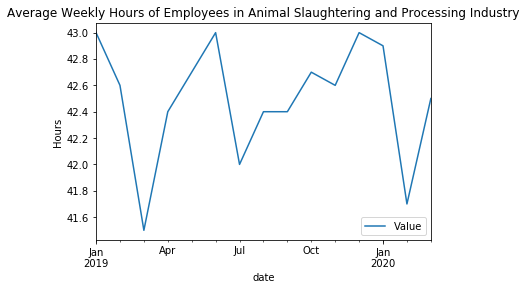

In [115]:
employment_data_hours.plot.line(title = 'Average Weekly Hours of Employees in Animal Slaughtering and Processing Industry').set_ylabel('Hours')